In [1]:
import numpy as np
#scipy常用在數學和科學上計算
import scipy.stats as si

In [2]:
S, K, T, r, sigma = 90, 100, 0.5, 0.01, 0.3
def BS(S, K, T, r, sigma): 
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))    
    call = S*si.norm.cdf(d1,0.0,1.0)-K*np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0)
    put = -S*si.norm.cdf(-d1,0.0,1.0)+K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0)
    return call,put
BS_call, BS_put= BS(S, K, T, r, sigma)
print ('S,K,T,r,sigma=', S, K, T, r, sigma)
print ('BS_call=',round(BS_call,4),', BS_put=', round(BS_put,4))

S,K,T,r,sigma= 90 100 0.5 0.01 0.3
BS_call= 4.1281 , BS_put= 13.6294


In [3]:
#建立想要的X座標 (K，履約價)
Ks = np.linspace(10, 150, num=10)

In [4]:
Ks

array([ 10.        ,  25.55555556,  41.11111111,  56.66666667,
        72.22222222,  87.77777778, 103.33333333, 118.88888889,
       134.44444444, 150.        ])

In [8]:
#顯示選擇權參數
for i in range(10):
    K = Ks[i]
    print ('S,K,T,r,sigma=',S, K, T, r, sigma)

S,K,T,r,sigma= 90 10.0 0.5 0.01 0.3
S,K,T,r,sigma= 90 25.555555555555557 0.5 0.01 0.3
S,K,T,r,sigma= 90 41.111111111111114 0.5 0.01 0.3
S,K,T,r,sigma= 90 56.666666666666664 0.5 0.01 0.3
S,K,T,r,sigma= 90 72.22222222222223 0.5 0.01 0.3
S,K,T,r,sigma= 90 87.77777777777777 0.5 0.01 0.3
S,K,T,r,sigma= 90 103.33333333333333 0.5 0.01 0.3
S,K,T,r,sigma= 90 118.88888888888889 0.5 0.01 0.3
S,K,T,r,sigma= 90 134.44444444444446 0.5 0.01 0.3
S,K,T,r,sigma= 90 150.0 0.5 0.01 0.3


In [36]:
#顯示選擇權參數對應之買權與賣權的價格
for i in range(10):
    K = Ks[i]
    BS_call, BS_put = BS(S, K, T, r, sigma)
    print ('BS_call=',round(BS_call,4),', BS_put=', round(BS_put,4))   #round表示結果顯示到小數第四位

BS_call= 80.0499 , BS_put= 0.0
BS_call= 64.5719 , BS_put= 0.0
BS_call= 49.0942 , BS_put= 0.0003
BS_call= 33.6886 , BS_put= 0.0726
BS_call= 19.3973 , BS_put= 1.2593
BS_call= 8.8945 , BS_put= 6.2344
BS_call= 3.2796 , BS_put= 16.0975
BS_call= 1.0167 , BS_put= 29.3126
BS_call= 0.278 , BS_put= 44.0519
BS_call= 0.0698 , BS_put= 59.3216


In [14]:
#計算各個履約價的買賣權價格，並儲存到list內
BS_calls =[]
BS_puts = []
for i in range(10):
    K = Ks[i]
    BS_call, BS_put = BS(S, K, T, r, sigma)
    BS_calls.append(BS_call)
    BS_puts.append(BS_put)

In [17]:
print(BS_calls)
print(BS_puts)

[80.04987520807317, 64.57190331157139, 49.0942404453216, 33.68856008365088, 19.39728859275708, 8.894458924867294, 3.279580560912205, 1.0167116318704164, 0.278015300286409, 0.06975532482873292]
[9.000644740608921e-26, 2.051045274546004e-09, 0.0003090343541097074, 0.07260057123621333, 1.2593009788952578, 6.234443209558293, 16.097536744156045, 29.31263971366708, 44.051915280635924, 59.32162720373108]


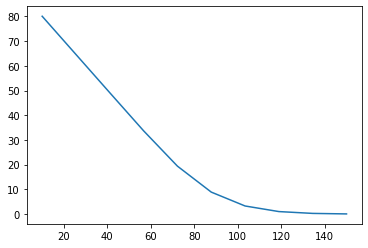

In [31]:
#繪製買權圖，並儲存圖檔
import matplotlib.pyplot as plt
plt.plot(Ks, BS_calls)
plt.savefig("call.png")
plt.show()

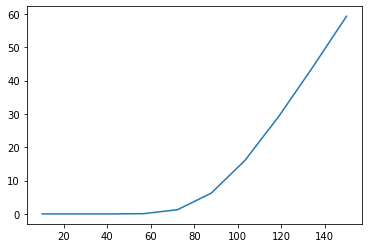

In [32]:
#繪製賣權圖，並儲存圖檔
plt.plot(Ks, BS_puts)
plt.savefig("put.png")
plt.show()

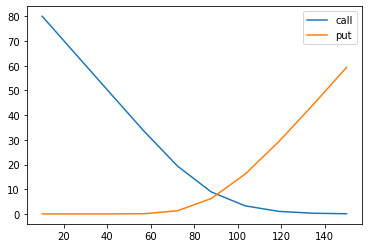

In [35]:
#將買賣權圖合併
plt.plot(Ks, BS_calls, label = 'call')
plt.plot(Ks, BS_puts, label = 'put')
plt.legend()  #加入圖形標籤
plt.savefig("mix.png")
plt.show()